#Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Pre-Processing

Data loading

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_houses = pd.read_csv('/content/drive/MyDrive/Projetos/PROJETO SEJA UM DATA SCIENTIST/Project Cyclic/kc_house_data.csv')

In [5]:
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [6]:
df_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [7]:
df_houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df_houses.drop(['sqft_living15', 'sqft_lot15'], axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069


In [9]:
df_houses['price'].max() , df_houses['price'].min()

(7700000.0, 75000.0)

Visualização dos dados

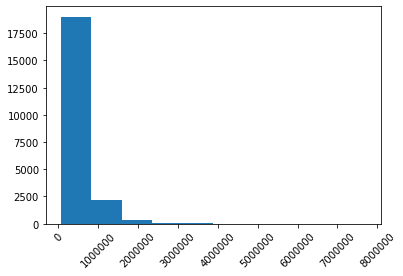

In [10]:

plt.hist(x= df_houses['price']);
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

In [11]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'bedrooms','bathrooms', 'floors'], color='price')
graph.show()

Testar algumas hipóteses

In [12]:
#Compras casas com o preço abaixo da média.
df_houses[df_houses['price'] < df_houses['price'].mean()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
6,1321400060,20140627T000000,257500.000,3,2.250,1715,6819,2.000,0,0,3,7,1715,0,1995,0,98003,47.310,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [13]:
df_houses_region = df_houses[['price','zipcode']].groupby('zipcode').mean().reset_index()
df_houses_region

,zipcode,price
0,98001,280804.691
1,98002,234284.035
2,98003,294111.279
3,98004,1355927.082
4,98005,810164.875
...,...,...
65,98177,676185.392
66,98178,310612.756
67,98188,289078.346
68,98198,302878.882


In [14]:
result = pd.DataFrame()
for dados in df_houses_region.values:
  a = df_houses[(df_houses['zipcode'] == int(dados[0])) & (df_houses['price'] < dados[1])]
  result = result.append(a.loc[a['price'].isin([a['price'].min()])],ignore_index=True)
result



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3751600030,20140717T000000,100000.000,2,1.000,770,17334,1.000,0,0,3,7,770,0,1978,0,98001,47.300,-122.269,1480,17334
1,8856000545,20140507T000000,100000.000,2,1.000,910,22000,1.000,0,0,3,6,910,0,1956,0,98001,47.278,-122.252,1326,9891
2,7335400215,20150505T000000,95000.000,1,0.750,760,5746,1.000,0,0,4,5,760,0,1915,0,98002,47.305,-122.215,970,6696
3,421049114,20141009T000000,128000.000,3,1.000,910,11117,1.000,0,0,3,7,910,0,1955,0,98003,47.343,-122.309,1490,8416
4,2425700022,20140929T000000,425000.000,4,1.750,1730,11890,1.000,0,0,2,7,980,750,1955,0,98004,47.598,-122.194,2100,12325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1423049019,20140523T000000,90000.000,2,1.000,580,7500,1.000,0,0,3,5,580,0,1943,0,98178,47.485,-122.251,1700,11250
70,5381000048,20150427T000000,110000.000,2,1.000,790,8250,1.000,0,0,3,6,790,0,1947,0,98188,47.452,-122.286,900,8250
71,2724200705,20141212T000000,95000.000,2,1.000,800,8550,1.000,0,0,3,7,800,0,1947,0,98198,47.407,-122.294,1490,8550
72,6929602721,20150408T000000,95000.000,2,1.000,960,7000,1.000,0,0,3,4,960,0,1918,0,98198,47.386,-122.307,1850,8120


Para a primeira parte, levei em consideração as casas de valor mais baixo por região para poder comprar e revender a um preço mais próximo a média.

PARTE 2

---



In [15]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'sqft_lot','sqft_living'], color='price')
graph.show()

In [16]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'waterfront','condition'], color='price')
graph.show()

In [22]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'sqft_above','sqft_basement', 'zipcode'], color='price')
graph.show()

In [21]:
graph = px.scatter_matrix(df_houses, dimensions=['price', 'yr_built','yr_renovated','view'], color='price')
graph.show()

In [47]:
df_houses[df_houses['yr_renovated'] > 0]['price'].mean()

760379.0295404814

In [48]:
df_houses[df_houses['yr_renovated'] == 0]['price'].mean()

530360.8181554665

Após as análises dos gráficos, selecionei as features que para mim tem mais valor para uma análise. São elas, bedrooms/bathrooms/sqft_living/condition/zipcode/yr_built e sqft_above. Essas 5 features mais movimentou os preços das casas.

In [49]:
features_importance = pd.DataFrame()
features_importance = df_houses.drop(['sqft_living15', 'sqft_lot15', 'date','sqft_lot','floors','waterfront','view','grade','sqft_basement','yr_built'], axis=1)

In [50]:
features_importance

,id,price,bedrooms,bathrooms,sqft_living,condition,sqft_above,yr_renovated,zipcode,lat,long
0,7129300520,221900.000,3,1.000,1180,3,1180,0,98178,47.511,-122.257
1,6414100192,538000.000,3,2.250,2570,3,2170,1991,98125,47.721,-122.319
2,5631500400,180000.000,2,1.000,770,3,770,0,98028,47.738,-122.233
3,2487200875,604000.000,4,3.000,1960,5,1050,0,98136,47.521,-122.393
4,1954400510,510000.000,3,2.000,1680,3,1680,0,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.000,3,2.500,1530,3,1530,0,98103,47.699,-122.346
21609,6600060120,400000.000,4,2.500,2310,3,2310,0,98146,47.511,-122.362
21610,1523300141,402101.000,2,0.750,1020,3,1020,0,98144,47.594,-122.299
21611,291310100,400000.000,3,2.500,1600,3,1600,0,98027,47.535,-122.069


In [62]:
features_importance['price'].mean()

540088.1417665294

In [71]:
buy_house = features_importance[(features_importance['bedrooms'] > 3) & (features_importance['bedrooms']<= 7) & (features_importance['price'] < features_importance['price'].mean())
 & (features_importance['condition'] > 2) & (features_importance['yr_renovated'] == 0) ]

buy_house

,id,price,bedrooms,bathrooms,sqft_living,condition,sqft_above,yr_renovated,zipcode,lat,long
14,1175000570,530000.000,5,2.000,1810,3,1810,0,98107,47.670,-122.394
17,6865200140,485000.000,4,1.000,1600,4,1600,0,98103,47.665,-122.343
20,6300500875,385000.000,4,1.750,1620,4,860,0,98133,47.703,-122.341
22,7137970340,285000.000,5,2.500,2270,3,2270,0,98092,47.327,-122.169
34,7955080270,322500.000,4,2.750,2060,3,1280,0,98058,47.428,-122.157
...,...,...,...,...,...,...,...,...,...,...,...
21562,2122059216,422000.000,4,2.500,2930,3,2930,0,98030,47.385,-122.186
21563,9406530090,337000.000,4,2.500,2470,3,2470,0,98038,47.362,-122.041
21565,5007500120,341780.000,4,2.750,2260,3,2260,0,98001,47.351,-122.291
21594,5087900040,350000.000,4,2.750,2500,3,2500,0,98042,47.375,-122.107


Foi notado que, ao reformar uma casa, o preço médio sobe aproximadamente 230 Mil. Sendo assim, Irei comprar casas que não foram renovadas e com um preço abaixo da media - 230 Mil para conseguir máximar os lucros.

In [72]:
buy_house[buy_house['price'] < (buy_house['price'].mean() - 230000)]

,id,price,bedrooms,bathrooms,sqft_living,condition,sqft_above,yr_renovated,zipcode,lat,long
5639,7224000980,100000.000,4,1.000,1120,3,860,0,98055,47.490,-122.203
13519,723049158,135000.000,4,1.000,1460,3,1460,0,98146,47.501,-122.351
14224,4330600360,142500.000,4,0.750,1440,3,1440,0,98166,47.476,-122.337
15810,7129304540,133000.000,5,2.000,1430,3,1430,0,98118,47.519,-122.266
16367,3512100050,139000.000,4,1.500,1410,4,1410,0,98030,47.374,-122.188
18262,2891000610,148900.000,4,1.750,1700,3,1700,0,98002,47.325,-122.208


Fechando a PARTE 2 com a compra de 6 casas com possível 400% de lucro no final.